In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

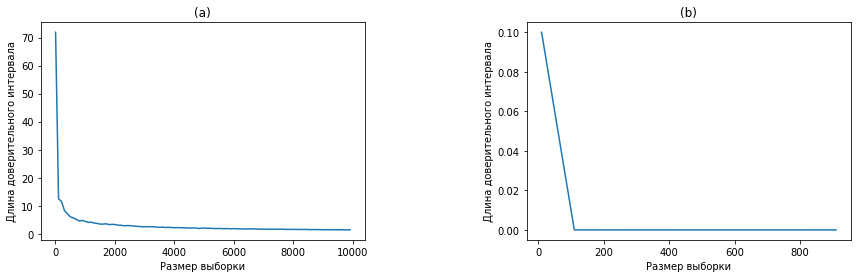

In [5]:
N = list(range(10, 10000, 100))
std = 5
gamma = 0.95
len_a, len_b, a_in_interval, b_in_interval = [], [], [], []
for n in N:
    X = np.random.normal(0, std, n)

    a_left = sum(X ** 2 / (stats.chi2.ppf((1 + gamma) / 2, n)))
    a_right = sum(X ** 2 / (stats.chi2.ppf((1 - gamma) / 2, n)))
    len_a.append(a_right - a_left)
    
    if n <= 1000:
        X_mean = np.mean(X)
        b_left = n * (X_mean ** 2) / (stats.norm.ppf((3 + gamma) / 4, n)) ** 2
        b_right = n * (X_mean ** 2) / (stats.norm.ppf((3 - gamma) / 4, n)) ** 2
        len_b.append(b_right - b_left)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(left=0.125, right=2, wspace=0.5)

ax1.title.set_text('(a)')
ax1.set_xlabel('Размер выборки')
ax1.set_ylabel('Длина доверительного интервала')
ax1.plot(N, len_a)

ax2.title.set_text('(b)')
ax2.set_xlabel('Размер выборки')
ax2.set_ylabel('Длина доверительного интервала')
ax2.plot(N[:len(len_b)], len_b)
plt.show()